In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import sklearn.model_selection

In [3]:
adata = sc.read("/data/mr423/project/data/3-OLINK_data_train_withOutlier_all.h5ad")
adata_test = sc.read("/data/mr423/project/data/3-OLINK_data_test_withOutlier_all.h5ad")

In [4]:
adata.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16,68.835044,60-70
3154285,0,1945,1,15,1945-01-15,2007-07-20,62.507871,60-70
1679423,1,1945,11,15,1945-11-15,2009-05-19,63.507187,60-70
1172610,1,1941,12,15,1941-12-15,2009-09-23,67.772758,60-70
4011532,1,1954,1,15,1954-01-15,2009-10-20,55.761807,50-60
...,...,...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14,50.247775,50-60
3378384,0,1950,4,15,1950-04-15,2009-06-27,59.200548,50-60
1220136,0,1945,6,15,1945-06-15,2008-11-11,63.408624,60-70


In [19]:
unique_clusters = adata.obs['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = adata.obs['sex'].value_counts()
print(cluster_sizes)

[0 1]
Total 2 of the cluster labels.
sex
0    20202
1    17102
Name: count, dtype: int64


In [20]:
unique_clusters = adata.obs['Age_Group'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = adata.obs['Age_Group'].value_counts()
print(cluster_sizes)

['60-70', '50-60', '40-50', '70-80', '30-40']
Categories (5, object): ['30-40' < '40-50' < '50-60' < '60-70' < '70-80']
Total 5 of the cluster labels.
Age_Group
60-70    16542
50-60    12021
40-50     8493
70-80      247
30-40        1
Name: count, dtype: int64


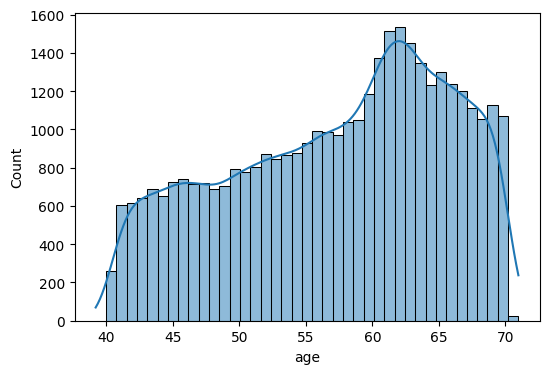

In [5]:
# 绘制目标变量的直方图
plt.figure(figsize=(6,4))
sns.histplot(adata.obs['age'], kde=True)
# plt.title('目标变量分布')
# plt.xlabel('目标变量值')
# plt.ylabel('频率')
plt.show()

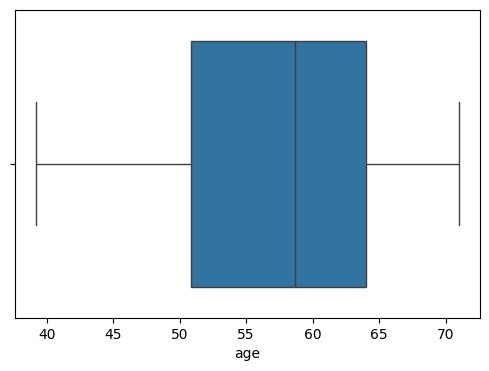

In [11]:
# 绘制箱线图
plt.figure(figsize=(6, 4))
sns.boxplot(x=adata.obs['age'])
# plt.title('目标变量箱线图')
# plt.xlabel('目标变量值')
plt.show()

In [12]:
# 计算基本统计量
stats = adata.obs['age'].describe()
print(stats)

# 检查目标变量的标准差
std_dev = adata.obs['age'].std()
print(f"标准差: {std_dev}")

count    37304.000000
mean        57.315124
std          8.192266
min         39.192334
25%         50.830938
50%         58.685832
75%         64.022587
max         70.986995
Name: age, dtype: float64
标准差: 8.192265664812599


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(adata.obs, test_size=0.1, random_state=0)

## Train data

### Analysis for gender data

In [7]:
unique_clusters = X_train['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = X_train['sex'].value_counts()
print(cluster_sizes)

[1 0]
Total 2 of the cluster labels.
sex
0    18177
1    15396
Name: count, dtype: int64


### Analysis for age cluster data

In [8]:
unique_clusters = X_train['Age_Group'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = X_train['Age_Group'].value_counts()
print(cluster_sizes)

['60-70', '40-50', '50-60', '70-80', '30-40']
Categories (5, object): ['30-40' < '40-50' < '50-60' < '60-70' < '70-80']
Total 5 of the cluster labels.
Age_Group
60-70    14914
50-60    10790
40-50     7641
70-80      227
30-40        1
Name: count, dtype: int64


## Val data

### Analysis for gender data

In [9]:
unique_clusters = X_val['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = X_val['sex'].value_counts()
print(cluster_sizes)

[1 0]
Total 2 of the cluster labels.
sex
0    2025
1    1706
Name: count, dtype: int64


### Analysis for age cluster data

In [10]:
unique_clusters = X_val['Age_Group'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = X_val['Age_Group'].value_counts()
print(cluster_sizes)

['60-70', '50-60', '40-50', '70-80']
Categories (5, object): ['30-40' < '40-50' < '50-60' < '60-70' < '70-80']
Total 4 of the cluster labels.
Age_Group
60-70    1628
50-60    1231
40-50     852
70-80      20
30-40       0
Name: count, dtype: int64


## Test data

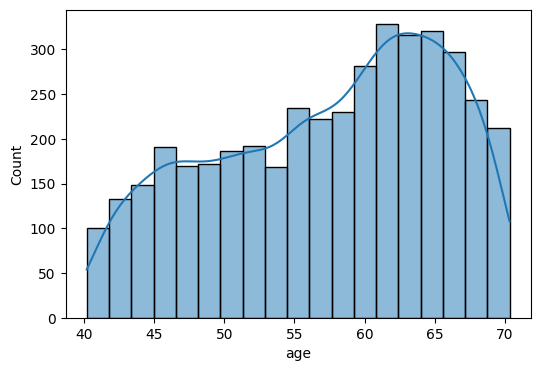

In [9]:
# 绘制目标变量的直方图
plt.figure(figsize=(6,4))
sns.histplot(adata_test.obs['age'], kde=True)
# plt.title('目标变量分布')
# plt.xlabel('目标变量值')
# plt.ylabel('频率')
plt.show()

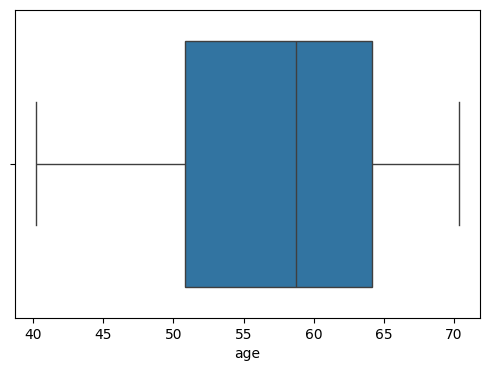

In [11]:
# 绘制箱线图
plt.figure(figsize=(6, 4))
sns.boxplot(x=adata_test.obs['age'])
# plt.title('目标变量箱线图')
# plt.xlabel('目标变量值')
plt.show()

In [12]:
# 计算基本统计量
stats = adata_test.obs['age'].describe()
print(stats)

# 检查目标变量的标准差
std_dev = adata_test.obs['age'].std()
print(f"标准差: {std_dev}")

count    4145.000000
mean       57.370906
std         8.114575
min        40.194387
25%        50.806297
50%        58.757016
75%        64.136893
max        70.340862
Name: age, dtype: float64
标准差: 8.114575322459928


### Analysis for gender data

In [17]:
unique_clusters = adata_test.obs['sex'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = adata_test.obs['sex'].value_counts()
print(cluster_sizes)

[0 1]
Total 2 of the cluster labels.
sex
0    2214
1    1931
Name: count, dtype: int64


### Analysis for age data

In [18]:
unique_clusters = adata_test.obs['Age_Group'].unique()

print(unique_clusters)
num_clusters = len(unique_clusters)
print(f"Total {num_clusters} of the cluster labels.")

cluster_sizes = adata_test.obs['Age_Group'].value_counts()
print(cluster_sizes)

['60-70', '50-60', '40-50', '70-80']
Categories (5, object): ['30-40' < '40-50' < '50-60' < '60-70' < '70-80']
Total 4 of the cluster labels.
Age_Group
60-70    1858
50-60    1329
40-50     942
70-80      16
30-40       0
Name: count, dtype: int64
